# Feature Selection

In [35]:
## import required libraries here
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
## load the dataset
data = pd.read_csv('processed_customer_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   float64
 3   Contract                                 7043 non-null   int64  
 4   MonthlyCharges                           7043 non-null   float64
 5   TotalCharges                             7043 non-null   float64
 6   Churn                                    7043 non-null   int64  
 7   gender_Female                            7043 non-null   float64
 8   gender_Male                              7043 non-null   float64
 9   Partner_No                               7043 non-null   float64
 10  Partner_Yes                              7043 no

## Methods to do Feature Selection

There are different methods to Select the Features and avoid the least useful features.

1. Remove Irrelevant or Redundant Features manually
2. Use Feature Importance from Tree-based Models
    + Train a Random Forest Classifier
    + Recursive Feature Elimination (RFE)
3. Consider Dimensionality Reduction with PCA

### Use Feature Importance from Tree-based Models

Tree-based models like Random Forest or Gradient Boosting Machines (GBM) can help to determine the importance of each feature in predicting customer churn

**1. Train a Random Forest Classifier**

+ Use a Random Forest model to calculate feature importance scores. Features with higher importance scores contribute more to the model’s prediction power.

+ This method gives a ranking of features based on their importance scores. Choose the top N features that have the highest importance scores.

+ Since the scores are almost similar and weak, consider to take everything.

**Results**

**Top Important Features:**

+ `TotalCharges (0.169656)`, `tenure (0.144576)`, and `MonthlyCharges (0.142438)`
+ These are the top three most important features in predicting customer churn.
+ This suggests that the total amount a customer has paid (TotalCharges), the duration of their tenure (tenure), and their monthly charges (MonthlyCharges) are significant indicators of whether a customer will churn or not.
+ Customers who have paid more or stayed longer, or those with varying monthly charges, may show different patterns related to churn.

**Moderately Important Features:**

+ `Contract (0.063575)`: The type of contract a customer has also plays a notable role in predicting churn.
+ This makes sense because customers with longer-term contracts may have lower churn rates compared to those with month-to-month contracts.
+ `OnlineSecurity_No (0.032517)`, `PaymentMethod_Electronic check (0.031070)`, `InternetService_Fiber optic (0.026065)`, `TechSupport_No (0.022948)`
+  These features also contribute to the model's predictive power.
+  For example, customers who do not have online security or tech support, or who use electronic checks, may be more prone to churn.

**Less Important Features**

+ `SeniorCitizen`, `OnlineBackup_No`, `gender_Female`, `gender_Male`, `DeviceProtection_No`, etc., have lower importance scores (ranging from around 0.02 to 0.01).
+ While these features still provide some predictive power, their impact is relatively smaller compared to the top features.
+ Demographic features like gender and SeniorCitizen have less influence, which indicates that other factors (like charges, contract type, and services used) are more critical in determining churn.

**Least Important Features:**

+ `InternetService_No`, `StreamingTV_No internet service`, `TechSupport_No internet service`, and similar features (importance scores below 0.004)
+ These features have very low importance scores.
+ Many of these features indicate whether a service is not available (e.g., "No internet service").
+ Their low importance suggests that they do not significantly help the model differentiate between customers who churn and those who do not.

**2. Recursive Feature Elimination (RFE)**

+ Recursive Feature Elimination is another method that recursively removes the least important features to improve model performance. It uses a base estimator (like a Random Forest) to rank the features by importance.

+ This will provide a ranking of features, where a ranking of 1 indicates the most important features.

**Results**

**Selected Features (Ranking = 1):**

+ The RFE process has identified 35 features (with a ranking of 1) that are considered the most important for predicting customer churn.
+ These features will likely contribute the most to the model's predictive power.
+ Demographic and customer-related features: SeniorCitizen, tenure, gender_Female, gender_Male, Partner_No, Partner_Yes, Dependents_No, Dependents_Yes.
+ Service-related features: OnlineBackup_No, OnlineBackup_Yes, DeviceProtection_No, DeviceProtection_Yes, TechSupport_No, TechSupport_Yes, StreamingTV_No, StreamingTV_Yes, StreamingMovies_No, StreamingMovies_Yes, InternetService_Fiber optic, InternetService_DSL, etc.
+ Billing and payment features: PaperlessBilling_No, PaperlessBilling_Yes, PaymentMethod_Bank transfer (automatic), PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check, MonthlyCharges, TotalCharges.
+ Churn-related features: Contract and features related to different services (like OnlineSecurity, TechSupport, etc.).

**Features Excluded by RFE (Ranking > 1):**

+ TechSupport_No internet service (Ranking = 2), PhoneService_No (Ranking = 3), PhoneService_Yes (Ranking = 4), OnlineSecurity_No internet service (Ranking = 5), InternetService_No (Ranking = 6), DeviceProtection_No internet service (Ranking = 7), OnlineBackup_No internet service (Ranking = 8), StreamingMovies_No internet service (Ranking = 9)
+ These features have been ranked lower (not selected) because they are less significant for predicting churn compared to the other features.
+ Many of these represent "No internet service" or similar, which are likely redundant or less informative because they don't directly contribute new information about the customer's behavior or attributes beyond what is already captured by other features.

In [37]:
## train a random forest classifier

X = data.drop(['Churn', 'customerID'], axis=1)  # Drop target and irrelevant features, customerID is irrelevant
y = data['Churn']

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display feature importances
print(feature_importances)

                                         importance
TotalCharges                               0.169007
tenure                                     0.145959
MonthlyCharges                             0.142845
Contract                                   0.064140
OnlineSecurity_No                          0.032541
PaymentMethod_Electronic check             0.031039
InternetService_Fiber optic                0.024319
TechSupport_No                             0.022592
SeniorCitizen                              0.019939
OnlineBackup_No                            0.019909
gender_Female                              0.017638
gender_Male                                0.017401
DeviceProtection_No                        0.016860
PaperlessBilling_Yes                       0.015118
PaperlessBilling_No                        0.014611
Partner_No                                 0.014557
Partner_Yes                                0.014058
OnlineSecurity_Yes                         0.012972
MultipleLine

In [38]:
## Recursive Feature Elimination (RFE) method

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RFE
rfe = RFE(estimator=rf_model, n_features_to_select=35)  # You can choose the number of features to keep
rfe.fit(X, y)

# Get the ranking of the features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print(feature_ranking.sort_values('Ranking'))

                                    Feature  Ranking
0                             SeniorCitizen        1
22                          OnlineBackup_No        1
24                         OnlineBackup_Yes        1
25                      DeviceProtection_No        1
26     DeviceProtection_No internet service        1
27                     DeviceProtection_Yes        1
28                           TechSupport_No        1
30                          TechSupport_Yes        1
31                           StreamingTV_No        1
33                          StreamingTV_Yes        1
34                       StreamingMovies_No        1
36                      StreamingMovies_Yes        1
37                      PaperlessBilling_No        1
38                     PaperlessBilling_Yes        1
39  PaymentMethod_Bank transfer (automatic)        1
40    PaymentMethod_Credit card (automatic)        1
41           PaymentMethod_Electronic check        1
19                        OnlineSecurity_No   

### Dimensionality Reduction with PCA

+ If the dataset has a lot of correlated features, use Principal Component Analysis (PCA) to reduce dimensionality while retaining most of the variance in the data.

+ PCA transforms the original features into a set of new uncorrelated components.

**Interpretation of the PCA Results**
+ The explained variance ratio tells you how much of the total variance in your data is captured by each principal component. Here’s a breakdown of your results:

+ **First Principal Component (PC1)** : Explains about 26.31% of the total variance in your data. This means that the first principal component captures the largest amount of variability among all components.

+ **Second Principal Component (PC2)** : Explains about 13.29% of the total variance. Together, the first two components explain roughly 39.6% of the variance.

+ **Subsequent Components** : The third to the tenth components each explain smaller portions of the variance, ranging from about 9.8% (PC3) to 2.98% (PC10).

**Inference**

+ The first 10 principal components together explain a significant portion of the variance in your data.
+ However, if you need to decide how many components to keep, it might be helpful to look for an "elbow" in the cumulative variance plot.
+ Typically, you would select the number of components that account for around 80-95% of the total variance.

In [39]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components to keep
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print(pca.explained_variance_ratio_)

[0.26306807 0.13293635 0.09797301 0.05904245 0.05187059 0.04653589
 0.03861925 0.03615863 0.03079465 0.02978442]


In [40]:
# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

Cumulative Explained Variance: [0.26306807 0.39600442 0.49397743 0.55301987 0.60489047 0.65142635
 0.69004561 0.72620424 0.75699889 0.78678332]


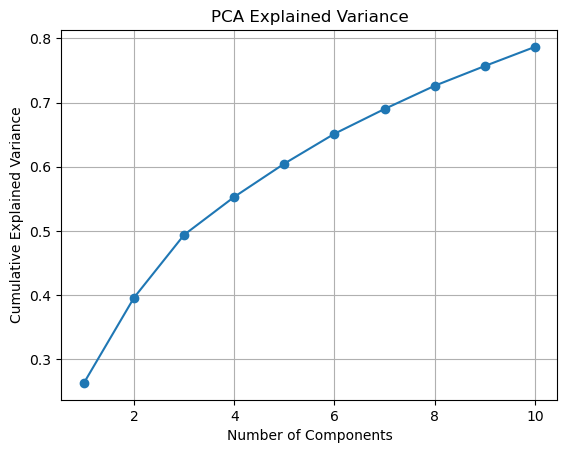

In [41]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()